In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn.functional as F
import sys, os
from sklearn.model_selection import train_test_split as tts
from scipy.ndimage import uniform_filter1d
from torch.utils.data import Dataset, DataLoader

sys.path.append(os.getcwd())
import models


In [2]:
# Import the keys
keys = list(np.load("keys/all_keys.npy"))
keys = [tuple(k) for k in keys]

# Import the data and labels
mi_matrices = {
    key:np.load(f"MI_matrices/MI_matrix_{key}.npy") for key in keys
}
data = {
    key:np.load(f"data/data_{key}.npy") for key in keys
}

# Sort data into a list, with the same ordering as the MI_matrices
mi_matrices_list = list()
data_list = list()
for key in keys:
    mi_matrices_list.append(mi_matrices[key])
    data_list.append(data[key])

In [21]:
# Hyperparams
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size=7
learning_rate = 0.00001
num_epochs = 50
input_size = 5000

In [22]:
# Numpify the data
data = np.asarray(data_list).reshape((48, 5000, 11))
labels = np.array(mi_matrices_list).reshape((48, 11, 11))

# Split the data into train and test
data_train, data_test, label_train, label_test = tts(data, labels, test_size=0.12)

# Modify variable type to tensor
data_train = models.NumbersDataset(data_train, label_train)
data_test = models.NumbersDataset(data_test, label_test)

# Create the dataloaders
loader_train = DataLoader(data_train, batch_size=batch_size, shuffle=True)
loader_test = DataLoader(data_test, batch_size=batch_size, shuffle=True)

In [23]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5000 * 11, 12000)
        self.fc2 = nn.Linear(12000, 12000)
        self.fc3 = nn.Linear(12000, 1200)
        self.fc4 = nn.Linear(1200, 11*11)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [24]:
# Model setup
model = Net()
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Traning loop
n_total_steps = len(loader_train)
loss_list = []
for epoch in range(num_epochs):
    for i, (dat, labs) in enumerate(loader_train):
        sample = dat.reshape(batch_size, -1).to(device)
        labs = labs.reshape(batch_size, -1).to(device)

        # forward
        output = model(sample)
        loss = criterion(output, labs)
        loss_list.append(loss.item())

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print(f"Did batch {i+1} of {len(loader_train)}")
    print(f"Epoch {epoch+1} of {num_epochs} done!")

Epoch 1 of 50 done!
Epoch 2 of 50 done!
Epoch 3 of 50 done!
Epoch 4 of 50 done!
Epoch 5 of 50 done!
Epoch 6 of 50 done!
Epoch 7 of 50 done!
Epoch 8 of 50 done!
Epoch 9 of 50 done!
Epoch 10 of 50 done!
Epoch 11 of 50 done!
Epoch 12 of 50 done!
Epoch 13 of 50 done!
Epoch 14 of 50 done!
Epoch 15 of 50 done!
Epoch 16 of 50 done!
Epoch 17 of 50 done!
Epoch 18 of 50 done!
Epoch 19 of 50 done!
Epoch 20 of 50 done!
Epoch 21 of 50 done!
Epoch 22 of 50 done!
Epoch 23 of 50 done!
Epoch 24 of 50 done!
Epoch 25 of 50 done!
Epoch 26 of 50 done!
Epoch 27 of 50 done!
Epoch 28 of 50 done!
Epoch 29 of 50 done!
Epoch 30 of 50 done!
Epoch 31 of 50 done!
Epoch 32 of 50 done!
Epoch 33 of 50 done!
Epoch 34 of 50 done!
Epoch 35 of 50 done!
Epoch 36 of 50 done!
Epoch 37 of 50 done!
Epoch 38 of 50 done!
Epoch 39 of 50 done!
Epoch 40 of 50 done!
Epoch 41 of 50 done!
Epoch 42 of 50 done!
Epoch 43 of 50 done!
Epoch 44 of 50 done!
Epoch 45 of 50 done!
Epoch 46 of 50 done!
Epoch 47 of 50 done!
Epoch 48 of 50 done!
E

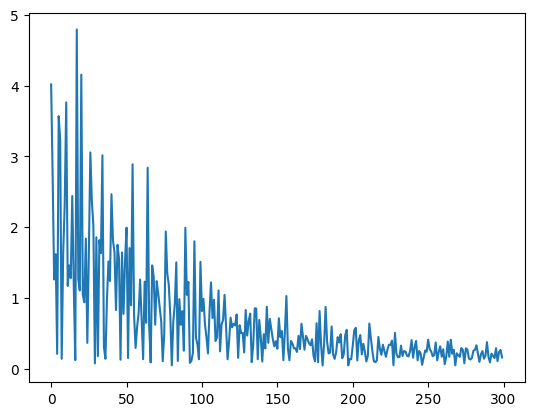

In [25]:
plt.plot(loss_list)